# Introduction

We have a dataset for reviews on an applications used for schedule planning and to-dos. As a Data Science Intern, we will perform necessary data pre-processing and analysis to get insisghts on the data. Final goal is to derive certain results on sentiment analysis for the reviews on the applications.

We will start with performing EDA on the data. For that, let's load the data and create our dataframe :

In [1]:
#libraries & packages
import  pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from afinn import Afinn


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# read csv file
reviewData = pd.read_csv("US_project.csv")

# showing data 
reviewData.sample(5)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
14666,dd1e790d-9dee-4ba3-8104-4d93ccaf3e3c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Don't like it much Event, Task, Favorites at t...",1,2.33.2,21-04-2019 11:16,"Hi, you can disable favorite bar (uncheck all ...",23-04-2019 14:56,2.33.2,most_relevant,com.appgenix.bizcal
10542,142562c4-2963-47ac-83cf-e54400ecf3d1,AbFo FerMel,https://play-lh.googleusercontent.com/a/ACg8oc...,Need to improve,0,NaN,13-09-2022 16:16,NaN,NaN,NaN,newest,prox.lab.calclock
13254,9d7ece19-0c05-4a36-855a-7d8444e18c44,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Not user friendly. Difficult to navigate. Noti...,5,NaN,13-02-2021 15:05,Apologies my app was too complicated for you. ...,06-09-2022 09:28,NaN,most_relevant,com.tasks.android
4323,7c0bf738-5053-4c7d-9037-a94f1c01a2b8,Laike,https://play-lh.googleusercontent.com/a-/ALV-U...,Markdown formatting is broken and tags are dis...,0,4.2.1,07-06-2023 07:52,Sorry to hear about this issue. Please let us ...,26-06-2023 03:33,4.2.1,newest,com.habitrpg.android.habitica
15720,4259488d-68c4-4629-88f7-1a0ee478985f,B Gill,https://play-lh.googleusercontent.com/a/ACg8oc...,Downloaded to use to plan projects but then di...,1,NaN,03-04-2023 16:11,NaN,NaN,NaN,newest,com.appxy.planner


In [3]:
 # Also, let's check rows & columns of the dataframe 
reviewData.shape

(16787, 12)

In [4]:
# Also some basic information of dataset like memory uage and data types of columns 
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


# Data Pre-processing

## Removing Irrelevant Data

As we can see from the sample data of the dataframe, the **userImage** column consisting of URLs has no relevancy to our analysis so it is better to get rid of it and reduce the size of our dataframe to help aid faster processing. Further the columns **reviewCreatedVersion** & **appVersion** have the same values creating redundancy so one of it will be removed as well.

**_Note_**: Keep an eye on the memory usage of data frame. It will be reducing as we clean our data further.

In [5]:
# removing irrevalent data
reviewData.drop(columns=['userImage','reviewCreatedVersion'],axis=1,inplace=True)

reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       16787 non-null  object
 1   userName       16787 non-null  object
 2   content        16786 non-null  object
 3   thumbsUpCount  16787 non-null  int64 
 4   at             16787 non-null  object
 5   replyContent   9168 non-null   object
 6   repliedAt      9168 non-null   object
 7   appVersion     14430 non-null  object
 8   sortOrder      16787 non-null  object
 9   appId          16787 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


## Fixing Datatypes

In [6]:
reviewData.describe()

,thumbsUpCount
count,16787.000000
mean,9.658962
std,32.028656
min,0.000000
25%,0.000000
50%,1.000000
75%,6.000000
max,1951.000000


**_info()_** shows most of the colume have a **object** datatype which is default datatype for non numeric values and one of it is **int64** datatype but using **_describe()_** we see that the maximum value for the integer datatype is _1951_ so **int16** should be enough.

In [7]:
#converting datatype for the int column
reviewData['thumbsUpCount'] = reviewData['thumbsUpCount'].astype('int16')
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       16787 non-null  object
 1   userName       16787 non-null  object
 2   content        16786 non-null  object
 3   thumbsUpCount  16787 non-null  int16 
 4   at             16787 non-null  object
 5   replyContent   9168 non-null   object
 6   repliedAt      9168 non-null   object
 7   appVersion     14430 non-null  object
 8   sortOrder      16787 non-null  object
 9   appId          16787 non-null  object
dtypes: int16(1), object(9)
memory usage: 1.2+ MB


Further, from all of the other columns, column **_at_** & **_repliedAt_** can be better represented as **datetime** datatype

In [8]:
datetime_colms = ['at','repliedAt']
for c in datetime_colms:
    reviewData[c] = pd.to_datetime(reviewData[c], dayfirst=True)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  object        
 1   userName       16787 non-null  object        
 2   content        16786 non-null  object        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   object        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  object        
 8   sortOrder      16787 non-null  object        
 9   appId          16787 non-null  object        
dtypes: datetime64[ns](2), int16(1), object(7)
memory usage: 1.2+ MB


Moreover, on checking for possible values of **_sortOrder_** & **_appId_** columns, it appears that they have limited set of values available as shown below. So these are perfect examples of **category** datatype.

In [9]:
reviewData['sortOrder'].unique()

array(['most_relevant', 'newest'], dtype=object)

In [10]:
reviewData['appId'].unique()

array(['com.anydo', 'com.todoist', 'com.ticktick.task',
       'com.habitrpg.android.habitica', 'cc.forestapp',
       'com.oristats.habitbull', 'com.levor.liferpgtasks', 'com.habitnow',
       'com.microsoft.todos', 'prox.lab.calclock',
       'com.gmail.jmartindev.timetune', 'com.artfulagenda.app',
       'com.tasks.android', 'com.appgenix.bizcal', 'com.appxy.planner'],
      dtype=object)

In [11]:
# Coverting their datatypes
categorical_colms = {'sortOrder':'category', 'appId':'category'}
reviewData = reviewData.astype(categorical_colms)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  object        
 1   userName       16787 non-null  object        
 2   content        16786 non-null  object        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   object        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  object        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), object(5)
memory usage: 984.5+ KB


Finally, all other columns fit to be a **string** datatype which will enable us to perform string operations if needed in future for any analysis.

In [12]:
string_colms = {'reviewId': 'string',
                'userName': 'string',
               'content' : 'string',
               'replyContent': 'string',
               'appVersion': 'string'}
reviewData = reviewData.astype(string_colms)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  string        
 1   userName       16787 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   string        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  string        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 984.5 KB


### Question  :
As we see there are many null values, what will be the best way to handle them ?

Let's begin with other pre-processing assigned for the project. 

In [13]:
reviewData.sample(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId
8428,cf9c9ba1-525b-4eb4-9d7e-622a8dac3624,Andrea,Nice app. However the timer doesn't work prope...,1,2023-12-30 14:27:00,"Hello Andrea, thank you for your feedback! You...",2023-12-30 14:54:00,2.1.8,newest,com.habitnow
10866,d02f3d61-507e-4214-85ca-bbb67063618e,Cameron McAlpine,Always have to manually sync.,0,2022-10-20 14:58:00,<NA>,NaT,5.23.4,newest,prox.lab.calclock
8547,5239f934-07d0-4234-b53d-503d5470cdb2,Stephany Spencer,"It's a great app, would have given 5 stars if ...",1,2022-09-06 12:33:00,<NA>,NaT,2.0.2,newest,com.habitnow
4007,e58deef6-2e97-4f06-a656-6c29a508463a,BC Sleasman,"It could have been a 5 if I was ""younger"". It ...",0,2024-03-05 14:14:00,Thanks so much for your review. Sorry to hear ...,2024-03-11 03:10:00,<NA>,most_relevant,com.habitrpg.android.habitica
5052,f4e52d1d-11be-4f1f-abd9-3903f12b54b1,A Google user,Great app to keep focused but too many glitche...,4,2020-03-07 21:12:00,<NA>,NaT,4.13.0,most_relevant,cc.forestapp


In [14]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  string        
 1   userName       16787 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   string        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  string        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 984.5 KB


In [15]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  string        
 1   userName       16787 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   string        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  string        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 984.5 KB


In [16]:
# So there is one row where content is null, let's remove that row entirely

reviewData = reviewData.dropna(subset=['content'])
reviewData.shape


(16786, 10)

In [17]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [18]:
# Convert to lower case
reviewData['content'] = reviewData['content'].str.lower()

reviewData.sample(5)


,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId
8093,b33af38f-6347-4755-b003-77d9264c0254,Safrin Ibrahim,the reminder is not working,0,2022-02-06 20:04:00,Hi: To make reminders work properly you only h...,2022-02-06 20:07:00,1.9.1,most_relevant,com.habitnow
11670,48d01ab7-5f0f-4cdc-8fd3-3d76409cc677,Echo Juwana,i really need the what you can say really anno...,0,2022-07-02 23:40:00,Hi. We don't fully understand your suggestion....,2022-07-03 08:11:00,4.4.1,most_relevant,com.gmail.jmartindev.timetune
6689,478169cc-9d96-4507-9109-f7feb2ce8377,uvnok,reminder does not come up for android 7,0,2021-03-07 17:15:00,<NA>,NaT,1.5.15,newest,com.oristats.habitbull
13521,df18feb7-fb65-4d44-b5f9-2a5467dcee7b,Christopher McCulloch,on the search for a to-do list app that lets m...,2,2022-12-03 16:44:00,"Christopher, devs are limited to 350 chars. To...",2022-12-03 16:48:00,3.8.1,newest,com.tasks.android
11235,5dfaf322-d584-4de3-a0af-8ebb1869fc3f,Jeremy Rasnic,glad i stumbled across this app. i don't chang...,22,2020-07-11 01:14:00,<NA>,NaT,5.15,most_relevant,prox.lab.calclock


In [19]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [20]:
# Removing links using regex match
reviewData['content'] = reviewData['content'].apply(lambda x: re.sub(r'http\S+', '', x))
reviewData['content'] = reviewData['content'].astype('string')

In [21]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [22]:
# Removing new lines using regex
reviewData['content'] = reviewData['content'].replace('\n', '', regex=True)
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [23]:
# removing alpha-numeric words
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
reviewData['content'] = reviewData['content'].astype('string')
reviewData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [24]:
# removing extra spaces from end as well as from in between
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join(x.strip().split()))
reviewData['content'] = reviewData['content'].astype('string')
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [25]:
# removing any special characters using regex
reviewData['content'] = reviewData['content'].replace('[^a-zA-Z0-9\s]', '', regex=True)
reviewData['content'] = reviewData['content'].astype('string')
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [26]:
#removing stop words
stop_words = set(stopwords.words('english'))
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
reviewData['content'] = reviewData['content'].astype('string')
reviewData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [27]:
# stemming
#stemmer = PorterStemmer()
#reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# I opted against stemming because I require valid words, linguistic precision, and semantic comprehension in this analysis. Therefore, lemmatization is the better choice.

In [28]:
#lemmatization
lemmatizer = WordNetLemmatizer()
reviewData['content'] = reviewData['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
reviewData['content'] = reviewData['content'].astype('string')
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [29]:
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 1.1 MB


In [30]:
reviewData.sample(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId
14032,d0816943-25a3-4318-a765-e63dfd9e17df,Kylar (Beso),best todo list app ive found memory issue app ...,9,2022-01-06 16:24:00,"Hi Kylar, thanks for your support. Really glad...",2022-01-10 09:55:00,2.24.0,most_relevant,com.tasks.android
8272,f6217c37-0360-4f90-9f0d-75ed2977278c,A Google user,useful far however im sure change daily routin...,4,2019-10-10 13:49:00,Hi Korinne. I think you are not understanding ...,2019-10-06 19:14:00,1.2.1,most_relevant,com.habitnow
9833,93b04bfa-a420-4327-b02d-c301420a2ba2,Paul Russell,fantastic task list took best wunderlist impro...,7,2020-05-22 10:32:00,<NA>,NaT,2.18.159,most_relevant,com.microsoft.todos
130,9f622eed-5ab8-4e73-a980-f4c096ed2e28,Andy Ray,pay get suggestion ai course already like ai b...,1,2024-03-03 02:28:00,We have many features that are included with t...,2024-03-04 08:50:00,<NA>,newest,com.anydo
12203,bdd66dde-a123-4ac8-bbae-d2ca0b09caa7,Michaela Trelby,really like app ended getting paid subscriptio...,18,2022-04-26 01:23:00,Hi! 👋 Thanks a lot for your feedback 🧡 We'll a...,2022-04-26 08:47:00,4.3,most_relevant,com.gmail.jmartindev.timetune


### Question : 
It is seen that the size of dataframe is increased from 984kB to 1.1+MB after performingabove techniques. Logically, we have removed a lot of stuffs from content, if any, or even if it is not, the size should have been either the same or reduced. What is the reason for the increment ?

## Text Data Plots

As we already did lemmetization, most of the words which would have a magnitude of emotions demostrated with comparative or superlative degree would have been convertated to positive degree. For eg : better or best to good. So we can perform sentimental analysis plot as Postive, neutral, negative and not very positive, positive, neutral, negative, very negative. 

### Word Cloud
For initial plotting of words, we would visualize frequency of words in text data by comparing relative size based on their count. 

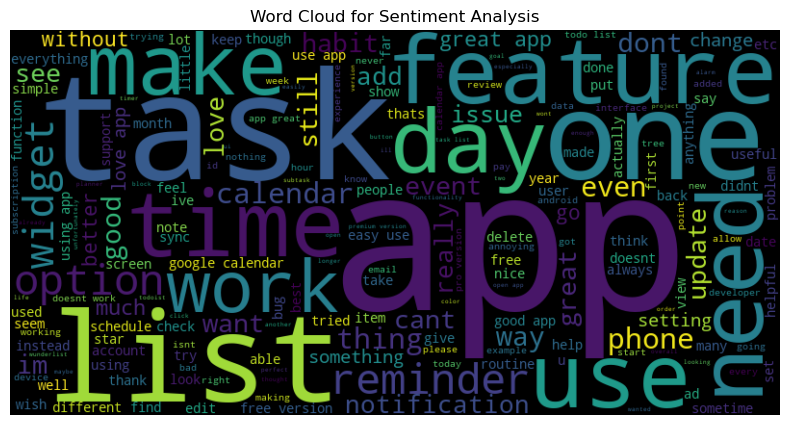

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all text data into a single string
text_data = " ".join(reviewData['content'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sentiment Analysis")
plt.show()

### Bar Chart for Word Frequencies
Now that we know, that there are certain words that occur relatively more frequent then other based on the size of the words in the plotting, we should be checking upon exactly how frequent are those by quantization of the frequency count.

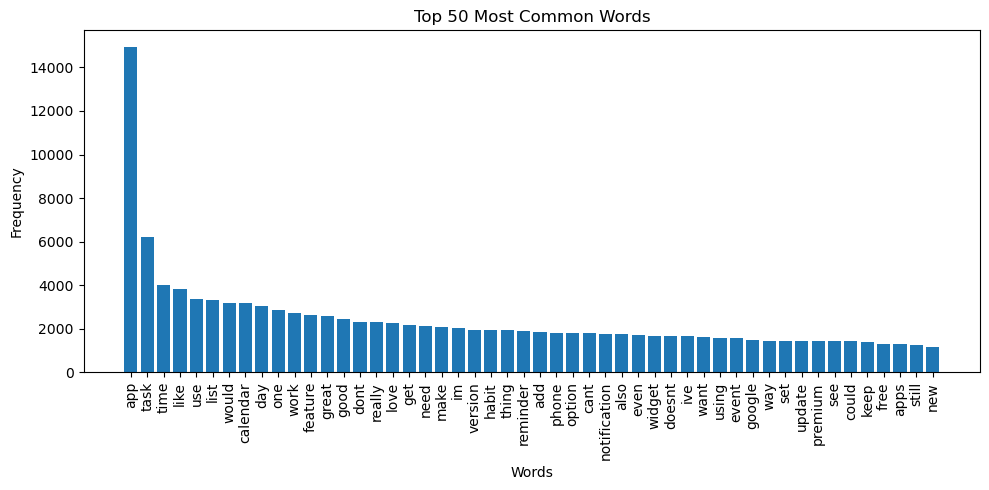

In [32]:
from collections import Counter
import matplotlib.pyplot as plt
import mplcursors

# Split text data into words and count frequencies
words = text_data.split()
word_counts = Counter(words)

# Plot bar chart
common_words = word_counts.most_common(50)  # Top 10 most common words
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words')
plt.xticks(rotation=90)
plt.tight_layout()
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Frequency: {sel.artist.get_height()}"))
plt.show()


### Histograms of Text Lengths
Further, we know that to express sentiments people usually pour out what's on their mind. A lengthy text would mean that the sentiments are very strong whereas a smaller text would imply neutral or lower intensity sentiments. Let's explore the same :

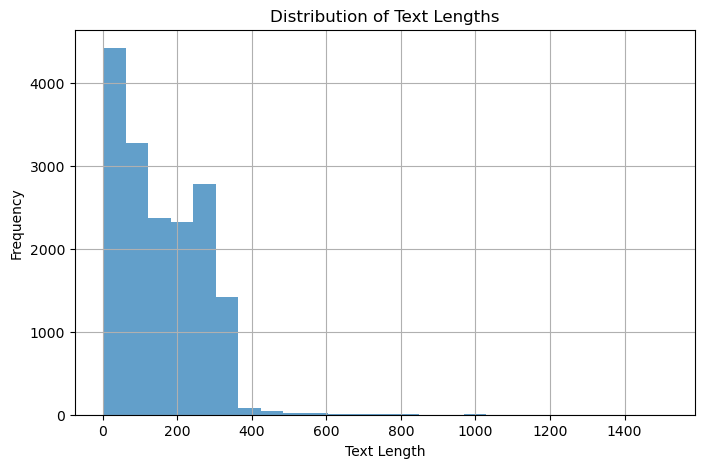

In [33]:
text_lengths = reviewData['content'].dropna().apply(len)
plt.figure(figsize=(8, 5))
plt.hist(text_lengths, bins=25, alpha=0.7)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(True)
plt.show()

In [34]:
# why is this so distributed ? because the maximum length is 1500+. So X-axis is highly dispersed.
max_text_length = reviewData['content'].dropna().apply(len).max()
print("Maximum Text Length:", max_text_length)

Maximum Text Length: 1513


### Sentiment Distribution Pie Chart
Finally, we would like to see the sentiment distriution in 3 major categories viz positive, neutral & negative within the text data that we have. This would give a precise cumulative idea of sentiment being displayed through **content** column. **However, as we have not yet differentiated sentiments of each entry in content column, we will be plotting pie charts after modeling with different approaches.**

## Modeling

### VADER (Valence Aware Dictionary and sEntiment Reasoner):
VADER is a lexicon and rule-based sentiment analysis tool specifically designed for **social media text**. It assigns sentiment scores (positive, negative, or neutral) to **individual words** and calculates an overall sentiment score for a text based on the combination of these word-level scores and syntactic rules.

In [35]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_scores'] = reviewData['content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
reviewData['compound'] = reviewData['sentiment_scores'].apply(lambda x: x['compound'])
reviewData['positive'] = reviewData['sentiment_scores'].apply(lambda x: x['pos'])
reviewData['negative'] = reviewData['sentiment_scores'].apply(lambda x: x['neg'])
reviewData['neutral'] = reviewData['sentiment_scores'].apply(lambda x: x['neu'])

# Classify sentiment based on compound score
reviewData['sentiment'] = reviewData['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(15)


,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.241, 'neu': 0.662, 'pos': 0.097, 'co...",-0.7783,0.097,0.241,0.662,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'neg': 0.051, 'neu': 0.889, 'pos': 0.061, 'co...",0.1280,0.061,0.051,0.889,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.207, 'neu': 0.753, 'pos': 0.04, 'com...",-0.8357,0.040,0.207,0.753,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'neg': 0.121, 'neu': 0.626, 'pos': 0.252, 'co...",0.7717,0.252,0.121,0.626,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.214, 'neu': 0.607, 'pos': 0.179, 'co...",-0.2914,0.179,0.214,0.607,negative
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,smart grocery list hell might handy sort list ...,19,2019-01-17 00:09:00,Please note that you can turn off the smart li...,2019-01-30 15:18:00,4.12.0.5,most_relevant,com.anydo,"{'neg': 0.131, 'neu': 0.723, 'pos': 0.147, 'co...",-0.0516,0.147,0.131,0.723,negative
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,wunderlist everything needed issue app replace...,6,2020-04-30 06:46:00,"Any.do is a task management app, which has no ...",2020-05-03 10:27:00,<NA>,most_relevant,com.anydo,"{'neg': 0.155, 'neu': 0.654, 'pos': 0.19, 'com...",0.2477,0.190,0.155,0.654,positive
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,app almost year really enjoying mostly used gr...,84,2021-11-07 15:58:00,This could happen if a user pressed on an adve...,2021-11-08 14:36:00,5.15.2.1,most_relevant,com.anydo,"{'neg': 0.104, 'neu': 0.824, 'pos': 0.072, 'co...",-0.1206,0.072,0.104,0.824,negative
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,almost perfect developer choose ignore one imp...,3,2019-07-07 15:10:00,Popups have been proven to increase productivi...,2019-07-09 11:09:00,<NA>,most_relevant,com.anydo,"{'neg': 0.214, 'neu': 0.67, 'pos': 0.116, 'com...",-0.5256,0.116,0.214,0.670,negative
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,annoyed keep signing deleted list ive working ...,29,2019-09-29 16:03:00,"Hi, that's odd, please send us a bug report in...",2019-10-02 19:51:00,4.15.8.11,most_relevant,com.anydo,"{'neg': 0.061, 'neu': 0.843, 'pos': 0.096, 'co...",0.3612,0.096,0.061,0.843,positive


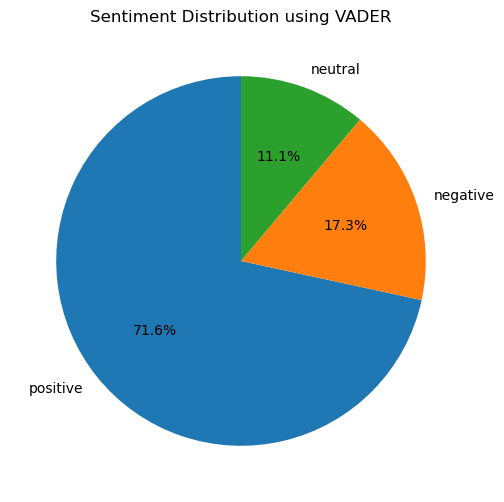

In [36]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using VADER')
plt.show()

### SentiWordNet:
SentiWordNet is a lexical resource that assigns sentiment scores to words based on their synsets (sets of **synonymous words**). Each word's sentiment score in SentiWordNet corresponds to its positivity, negativity, and objectivity.

In [37]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [38]:
# Function to get sentiment scores using SentiWordNet
def get_sentiment_scores(text):
    tokens = word_tokenize(text)
    pos_score = 0
    neg_score = 0
    obj_score = 0
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        synsets = list(swn.senti_synsets(lemma))
        if synsets:
            pos_score += synsets[0].pos_score()
            neg_score += synsets[0].neg_score()
            obj_score += synsets[0].obj_score()
    total_score = pos_score - neg_score
    return {'positive': pos_score, 'negative': neg_score, 'objective': obj_score, 'total': total_score}

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_scores'] = reviewData['content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
reviewData['positive'] = reviewData['sentiment_scores'].apply(lambda x: x['positive'])
reviewData['negative'] = reviewData['sentiment_scores'].apply(lambda x: x['negative'])
reviewData['objective'] = reviewData['sentiment_scores'].apply(lambda x: x['objective'])
reviewData['total_score'] = reviewData['sentiment_scores'].apply(lambda x: x['total'])

# Classify sentiment based on total score
reviewData['sentiment'] = reviewData['total_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(15)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,objective,total_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'positive': 2.75, 'negative': 1.625, 'objecti...",-0.7783,2.750,1.625,0.662,positive,33.625,1.125
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 0.375, 'objectiv...",0.1280,1.500,0.375,0.889,positive,40.125,1.125
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 1.75, 'objective...",-0.8357,1.500,1.750,0.753,negative,34.750,-0.250
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'positive': 4.25, 'negative': 2.375, 'objecti...",0.7717,4.250,2.375,0.626,positive,26.375,1.875
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 2.5, 'objective'...",-0.2914,1.500,2.500,0.607,negative,35.000,-1.000
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,smart grocery list hell might handy sort list ...,19,2019-01-17 00:09:00,Please note that you can turn off the smart li...,2019-01-30 15:18:00,4.12.0.5,most_relevant,com.anydo,"{'positive': 2.25, 'negative': 1.5, 'objective...",-0.0516,2.250,1.500,0.723,positive,32.250,0.750
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,wunderlist everything needed issue app replace...,6,2020-04-30 06:46:00,"Any.do is a task management app, which has no ...",2020-05-03 10:27:00,<NA>,most_relevant,com.anydo,"{'positive': 3.75, 'negative': 1.375, 'objecti...",0.2477,3.750,1.375,0.654,positive,27.875,2.375
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,app almost year really enjoying mostly used gr...,84,2021-11-07 15:58:00,This could happen if a user pressed on an adve...,2021-11-08 14:36:00,5.15.2.1,most_relevant,com.anydo,"{'positive': 2.875, 'negative': 0.875, 'object...",-0.1206,2.875,0.875,0.824,positive,34.250,2.000
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,almost perfect developer choose ignore one imp...,3,2019-07-07 15:10:00,Popups have been proven to increase productivi...,2019-07-09 11:09:00,<NA>,most_relevant,com.anydo,"{'positive': 2.375, 'negative': 3.125, 'object...",-0.5256,2.375,3.125,0.670,negative,26.500,-0.750
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,annoyed keep signing deleted list ive working ...,29,2019-09-29 16:03:00,"Hi, that's odd, please send us a bug report in...",2019-10-02 19:51:00,4.15.8.11,most_relevant,com.anydo,"{'positive': 1.375, 'negative': 0.875, 'object...",0.3612,1.375,0.875,0.843,positive,29.750,0.500


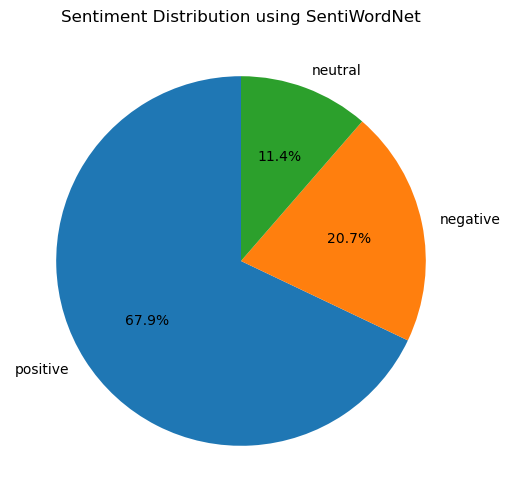

In [39]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using SentiWordNet')
plt.show()

### AFINN (Affective Norms for English Words):
AFINN is a list of **English words manually annotated with sentiment scores ranging from -5 (very negative) to +5 (very positive)**. It's a simple yet effective lexicon-based approach for sentiment analysis.

In [40]:
# Initialize the Afinn sentiment analyzer
afinn = Afinn()

# Function to get sentiment scores using Afinn
def get_sentiment_scores(text):
    return afinn.score(text)

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_score'] = reviewData['content'].apply(get_sentiment_scores)

# Classify sentiment based on sentiment score
reviewData['sentiment'] = reviewData['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(15)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,objective,total_score,sentiment_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'positive': 2.75, 'negative': 1.625, 'objecti...",-0.7783,2.750,1.625,0.662,negative,33.625,1.125,-6.0
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 0.375, 'objectiv...",0.1280,1.500,0.375,0.889,positive,40.125,1.125,3.0
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 1.75, 'objective...",-0.8357,1.500,1.750,0.753,negative,34.750,-0.250,-10.0
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'positive': 4.25, 'negative': 2.375, 'objecti...",0.7717,4.250,2.375,0.626,positive,26.375,1.875,4.0
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 2.5, 'objective'...",-0.2914,1.500,2.500,0.607,neutral,35.000,-1.000,0.0
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,smart grocery list hell might handy sort list ...,19,2019-01-17 00:09:00,Please note that you can turn off the smart li...,2019-01-30 15:18:00,4.12.0.5,most_relevant,com.anydo,"{'positive': 2.25, 'negative': 1.5, 'objective...",-0.0516,2.250,1.500,0.723,negative,32.250,0.750,-2.0
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,wunderlist everything needed issue app replace...,6,2020-04-30 06:46:00,"Any.do is a task management app, which has no ...",2020-05-03 10:27:00,<NA>,most_relevant,com.anydo,"{'positive': 3.75, 'negative': 1.375, 'objecti...",0.2477,3.750,1.375,0.654,negative,27.875,2.375,-2.0
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,app almost year really enjoying mostly used gr...,84,2021-11-07 15:58:00,This could happen if a user pressed on an adve...,2021-11-08 14:36:00,5.15.2.1,most_relevant,com.anydo,"{'positive': 2.875, 'negative': 0.875, 'object...",-0.1206,2.875,0.875,0.824,neutral,34.250,2.000,0.0
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,almost perfect developer choose ignore one imp...,3,2019-07-07 15:10:00,Popups have been proven to increase productivi...,2019-07-09 11:09:00,<NA>,most_relevant,com.anydo,"{'positive': 2.375, 'negative': 3.125, 'object...",-0.5256,2.375,3.125,0.670,negative,26.500,-0.750,-1.0
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,annoyed keep signing deleted list ive working ...,29,2019-09-29 16:03:00,"Hi, that's odd, please send us a bug report in...",2019-10-02 19:51:00,4.15.8.11,most_relevant,com.anydo,"{'positive': 1.375, 'negative': 0.875, 'object...",0.3612,1.375,0.875,0.843,positive,29.750,0.500,1.0


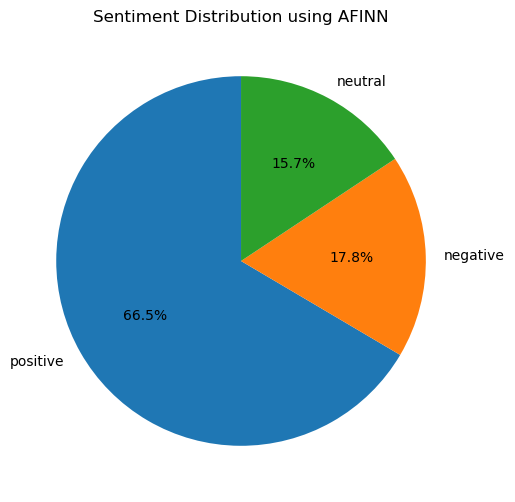

In [41]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using AFINN')
plt.show()

### Rule-Based Lexicon Integration:
In rule-based sentiment analysis systems, lexicons are often integrated into **predefined rules or heuristics**. For example, a rule might state that if a sentence contains more positive words than negative words from a lexicon, classify it as positive sentiment; otherwise, classify it as negative sentiment.

In [42]:
# Define a custom lexicon with sentiment scores for specific words
custom_lexicon = {
    'good': 1,
    'excellent': 1,
    'bad': -1,
    'terrible': -1,
    'great' : 1,
    'love' : 1,
    'like': 1,
    'best': 1,
    'annoying': -1,
    'nice': 1,
    'bug': -1,
    'better': 1,
    'problem': -1,
    'issue': -1,
    'pro': 1,
    'perfect': 1,
    'cant': -1,
    'well': 1,
    'helpful': 1,
    'right': 1,
    'dont': -1,
    'simple': 1
}

# Function to get sentiment scores using the custom lexicon
def get_sentiment_score(text):
    words = text.lower().split()
    sentiment_score = 0
    for word in words:
        if word in custom_lexicon:
            sentiment_score += custom_lexicon[word]
    return sentiment_score

# Apply the sentiment analysis function to the 'content' column
reviewData['sentiment_score'] = reviewData['content'].apply(get_sentiment_score)

# Classify sentiment based on sentiment score
reviewData['sentiment'] = reviewData['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
reviewData.head(15)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,objective,total_score,sentiment_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'positive': 2.75, 'negative': 1.625, 'objecti...",-0.7783,2.750,1.625,0.662,negative,33.625,1.125,-1
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 0.375, 'objectiv...",0.1280,1.500,0.375,0.889,neutral,40.125,1.125,0
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 1.75, 'objective...",-0.8357,1.500,1.750,0.753,positive,34.750,-0.250,1
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'positive': 4.25, 'negative': 2.375, 'objecti...",0.7717,4.250,2.375,0.626,neutral,26.375,1.875,0
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'positive': 1.5, 'negative': 2.5, 'objective'...",-0.2914,1.500,2.500,0.607,positive,35.000,-1.000,1
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,smart grocery list hell might handy sort list ...,19,2019-01-17 00:09:00,Please note that you can turn off the smart li...,2019-01-30 15:18:00,4.12.0.5,most_relevant,com.anydo,"{'positive': 2.25, 'negative': 1.5, 'objective...",-0.0516,2.250,1.500,0.723,positive,32.250,0.750,1
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,wunderlist everything needed issue app replace...,6,2020-04-30 06:46:00,"Any.do is a task management app, which has no ...",2020-05-03 10:27:00,<NA>,most_relevant,com.anydo,"{'positive': 3.75, 'negative': 1.375, 'objecti...",0.2477,3.750,1.375,0.654,negative,27.875,2.375,-1
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,app almost year really enjoying mostly used gr...,84,2021-11-07 15:58:00,This could happen if a user pressed on an adve...,2021-11-08 14:36:00,5.15.2.1,most_relevant,com.anydo,"{'positive': 2.875, 'negative': 0.875, 'object...",-0.1206,2.875,0.875,0.824,neutral,34.250,2.000,0
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,almost perfect developer choose ignore one imp...,3,2019-07-07 15:10:00,Popups have been proven to increase productivi...,2019-07-09 11:09:00,<NA>,most_relevant,com.anydo,"{'positive': 2.375, 'negative': 3.125, 'object...",-0.5256,2.375,3.125,0.670,neutral,26.500,-0.750,0
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,annoyed keep signing deleted list ive working ...,29,2019-09-29 16:03:00,"Hi, that's odd, please send us a bug report in...",2019-10-02 19:51:00,4.15.8.11,most_relevant,com.anydo,"{'positive': 1.375, 'negative': 0.875, 'object...",0.3612,1.375,0.875,0.843,neutral,29.750,0.500,0


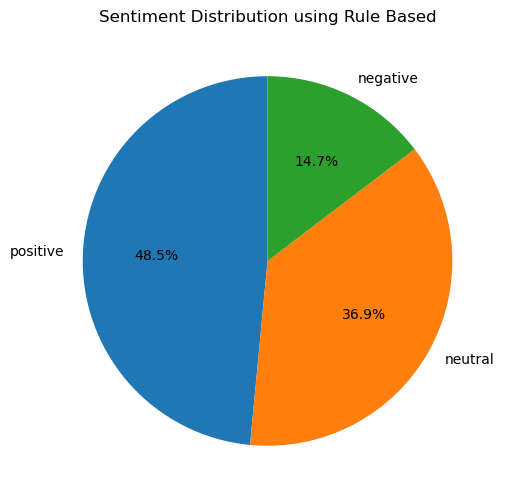

In [43]:
sentiment_counts = reviewData['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using Rule Based')
plt.show()

## Analysis Conclusion
After looking at how **VADER, SentiWordNet, AFINN and the Rule-Based Lexicon** Integration analyzed the data, it's clear that they all saw a **positive vibe** overall. But, there's a noticeable difference in how they saw neutral and negative feelings.

**VADER, SentiWordNet, and AFINN** tended to label **more things as negative than neutral**. This hints that the data has more strong feelings, either positive or negative, and fewer in-between ones.

On the flip side, **the Rule-Based Lexicon Integration** saw **more things as neutral than negative**. This happened because of the specific rules and word scores it used. In this method, how a word is seen depends a lot on the rules and scores set beforehand. If these aren't detailed enough, it can lead to more neutral labels.

Overall, the sentiment across all methods leans towards **positivity**, but there are differences in how they handle the shades of emotions.






